In [1]:
import cv2
import os
import sklearn
import numpy as np
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [5]:
    base_path = 'C:/Users/TEMP.MITS.001/Downloads/data'
    class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [6]:
IMAGE_SIZE = 150
BATCH_SIZE = 30
VERBOSE = 1

In [7]:
x_train=[]
y_train=[]

# Loading Training Datasets from folders
for i in class_names:
    folderPath = os.path.join(os.path.join(base_path,'Training'),i)
    for j in tqdm(os.listdir(folderPath), ncols=70):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
print('Training dataset Loading complete.')

# Loading Testing Datasets from folders
for i in class_names:
    folderPath = os.path.join(os.path.join(base_path, 'Testing'), i)
    for j in tqdm(os.listdir(folderPath), ncols=70):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
print('Testing dataset Loading complete.')

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state=0)

100%|████████████████████████████| 9008/9008 [00:38<00:00, 235.91it/s]


Training dataset Loading complete.


100%|██████████████████████████████| 740/740 [00:03<00:00, 199.81it/s]


Testing dataset Loading complete.


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


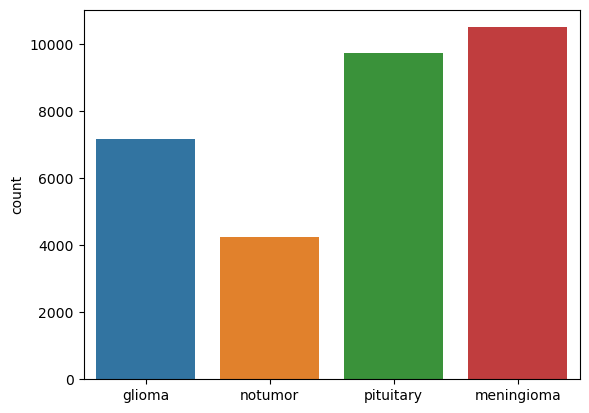

In [8]:
sns.countplot(y_train)
plt.show()

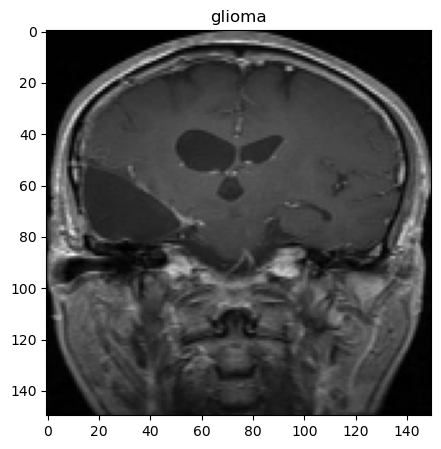

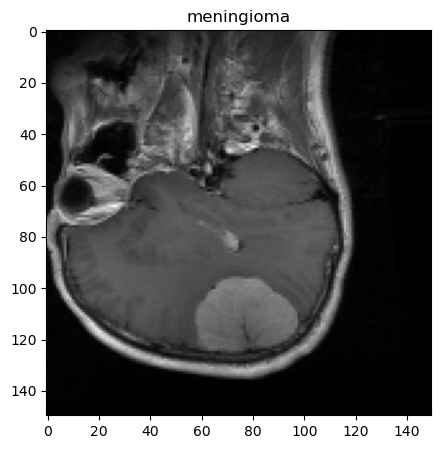

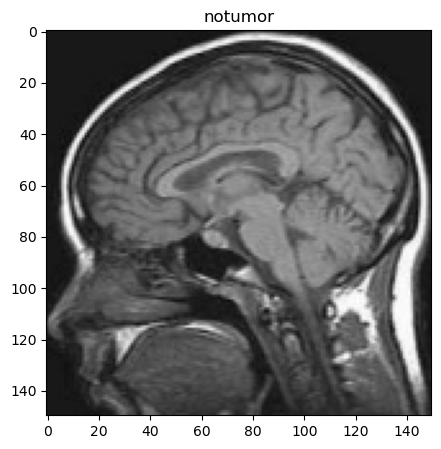

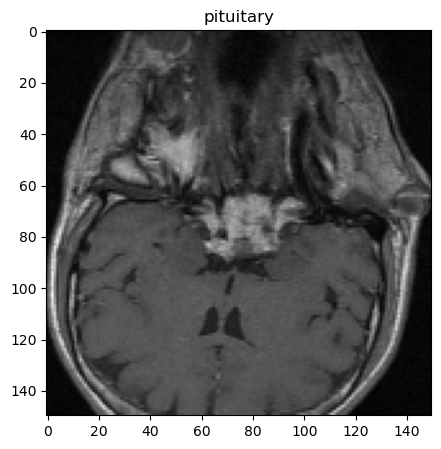

In [9]:
j=0
for i in class_names:
    j=0
    while True :
        if y_train[j]==i:
            plt.figure(figsize = (5,5))
            plt.imshow(x_train[j])
            plt.title(y_train[j])
            break
        j+=1

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=47, test_size=0.10)

print("Shapes X : Train :",x_train.shape,  " Test :",x_test.shape)
print("Shapes Y : Train :",y_train.shape,  " Test :",y_test.shape)

Shapes X : Train : (28507, 150, 150, 3)  Test : (3168, 150, 150, 3)
Shapes Y : Train : (28507,)  Test : (3168,)


In [11]:
y_train_new = [class_names.index(i) for i in y_train]
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = [class_names.index(i) for i in y_test]
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
inputShape = (IMAGE_SIZE, IMAGE_SIZE, 3)
xception = Xception(weights="imagenet", input_shape=inputShape, include_top=False)

83683744/83683744 [==============================] - 12s 0us/step


In [13]:
    model = xception.output
    model = tf.keras.layers.GlobalAveragePooling2D()(model)
    model = tf.keras.layers.Dropout(0.5)(model)
    model = tf.keras.layers.Dense(4, activation='softmax')(model)
    model = tf.keras.models.Model(inputs=xception.input, outputs=model)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                              

In [15]:
model.save_weights("xceptionn.h5")

In [17]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("xceptionn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,mode='auto',verbose=VERBOSE)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE,
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BATCH_SIZE,
	epochs=12, callbacks=[reduce_lr, checkpoint, tensorboard])

Epoch 1/12
950/950 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9347
Epoch 1: val_accuracy improved from -inf to 0.96433, saving model to xceptionn.h5
950/950 [==============================] - 1621s 2s/step - loss: 0.2037 - accuracy: 0.9347 - val_loss: 0.1032 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 2/12
950/950 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9729
Epoch 2: val_accuracy improved from 0.96433 to 0.96749, saving model to xceptionn.h5
950/950 [==============================] - 2230s 2s/step - loss: 0.0845 - accuracy: 0.9729 - val_loss: 0.1046 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 3/12
950/950 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9848
Epoch 3: val_accuracy improved from 0.96749 to 0.97506, saving model to xceptionn.h5
950/950 [==============================] - 1590s 2s/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0615 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 4/12
950/950 [==

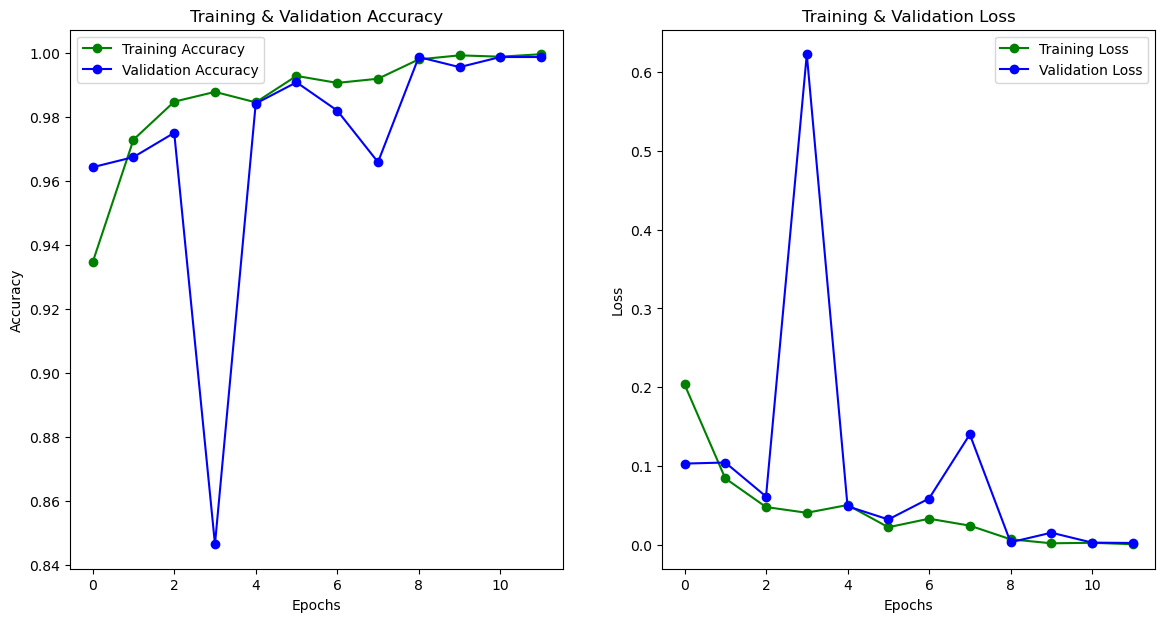

In [19]:
epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(14, 7)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'bo-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', label ='Training Loss')
ax[1].plot(epochs, val_loss, 'b-o', label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
plt.show()

In [20]:
result = model.evaluate(x_test, y_test)
print("Testing Loss :", result[0])
print("Testing Accuracy :", result[1]*100, "%")

99/99 [==============================] - 30s 304ms/step - loss: 0.0026 - accuracy: 0.9987
Testing Loss : 0.0026165598537772894
Testing Accuracy : 99.87373948097229 %


In [21]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)
y_test_edit = np.argmax(y_test , axis = 1)

99/99 [==============================] - 31s 305ms/step


In [23]:
cf_report = sklearn.metrics.classification_report(y_test_edit, predictions)
print(cf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       1.00      1.00      1.00      1037
           2       1.00      1.00      1.00       452
           3       1.00      1.00      1.00       975

    accuracy                           1.00      3168
   macro avg       1.00      1.00      1.00      3168
weighted avg       1.00      1.00      1.00      3168



<AxesSubplot:>

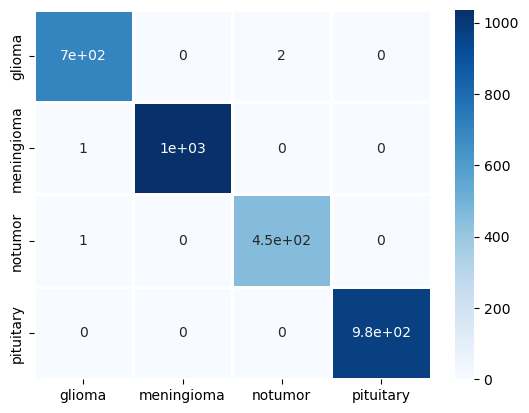

In [24]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=class_names, yticklabels=class_names)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

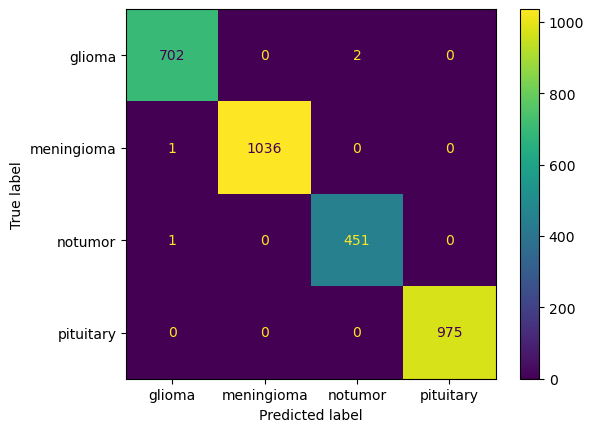

In [30]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions)
cm_display = ConfusionMatrixDisplay(cf_matrix,display_labels=['glioma', 'meningioma', 'notumor', 'pituitary']).plot()